McKenzie Skrastins, Rose Snyder, Joseph Fleishman, Pax Zissler.

**Introduction and Background**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Dataset was too large to upload to github

%env KAGGLE_USERNAME=mckharris
%env KAGGLE_KEY=XXXX

!kaggle datasets download -d samratp/bikeshare-analysis
!unzip -q bikeshare-analysis.zip

env: KAGGLE_USERNAME=mckharris
env: KAGGLE_KEY=6097d4ab5f2d9584a22b6f06d6052125
Dataset URL: https://www.kaggle.com/datasets/samratp/bikeshare-analysis
License(s): copyright-authors


In [ ]:
Washington = pd.read_csv("Washington-CapitalBikeshare-2016.csv")
NYC = pd.read_csv("NYC-CitiBike-2016.csv")
Chicago = pd.read_csv("Chicago-Divvy-2016.csv")

We imagine that our client is a US city's Department of Transportation (other than Washington, Chicago and NYC). The city is experiencing congestion due to high activity of motor vehicles on roads and not enough utilization of public transit. The DoT would like to encourage their residents to start using other modes of transportation, such as bikes. The DoT comes to us, a public transit consulting group, to see if this is feasible. We decide to study the use of bikes in similar cities to see if this is an avenue the DoT should pursue.

The bikeshare dataset was uploaded to Kaggle by Samrat Pandiri, a professional affiliated with the data and software company Teradata. In the acknowledgments section on Kaggle, Pandiri noted that the data originally was sourced from Udacity, an online education platform owned by the consulting firm Accenture. Further investigation revealed that each dataset was created by a distinct, privately operated bikeshare company. For instance, Washington D.C.'s data was collected by Capital Bikeshare, which serves the D.C. area exclusively. New York City's data came from Citi Bike, which operates throughout NYC and parts of New Jersey. Chicago's data was sourced from Divvy, a service limited to Chicago and Evanston. The most plausible explanation for how this data ended up on Kaggle is that Accenture obtained the datasets from these individual bikeshare companies for consulting purposes. Once their work was complete, they made the data available through Udacity’s subscription-based data platform.

This dataset was of specific interest to our consulting group for several reasons. First, the data contains a broad pool of points from which to refine our conclusions. This dataset also pulls from three highly populated US cities (particularly New York City). It includes predictors related to the locations of the biking routes. Finally, many of the predictors center around consumer data, allowing our company to not only extract information about the use of bikes, but the individuals who use the bikes.

Our consulting stressed the importance of acknowledging that the consumer data reflected real individuals and that their privacy and autonomy must be respected; when conducting this analysis, proper measures and strategies were taken ensure that all experimentation was unbiased and ethical. For example, all consumer data was made numerical if it wasn't already--making the human identities of the datapoints untraceable.

For the purposes of this research, our consulting group decided to primarily focus on the New York City region. As reported by the U.S. Department of Transportation, this city has the highest use of bikeshares (https://data.bts.gov/stories/s/Bikeshare-and-e-scooters-in-the-U-S-/fwcs-jprj/#:~:text=Looking%20at%20the%20remaining%2053,having%2010%20or%20fewer%20stations). Hence, we focused on this region to advise our client on how to further promote bikeshare services in the same way New York City does.

Duration: How long the bikes was in use, recorded in seconds. This is a numerical value.

State date: The day and time in which the bike started to be used. This is a date value.

End date: The day and time in which the bike stopped being used.This is a date value.

Start station number: The unique label associated with the station in which the bike was picked up from. This is a numerical value.

Start station: The cross street in which the bike was picked up from. This is a string (text).

End station number: The unique label associated with the station in which the bike was dropped off at. This is a numerical value.

End station: The cross street in which the bike was dropped off at. This is a string (text).

Bike number: the unique label associated with the bike. This is a string (text).

Member type: Whether the rider is a member of the bikeshare's company. This is a categorical value.



**Specific to NYC Dataset:**

start station latitude: The latudial location of the bike's starting location. This is a numerical value.

start station longitude: The longitudal location of the bike's starting location. This is a numerical value.

end station latitude: The latudial location of the bike's ending location. This is a numerical value.

end station longitude: The longitudal location of the bike's ending location. This is a numerical value.

birth year: the year in which the rider was born. This is a numerical value

gender: the gender identity of the rider. This is a categorical value.



**Specific to Chicago dataset:**

trip_id: the unique label associated with the trip recorded.

We've decided to not remove any variables from the datasets. Not all of the datasets have the same predictors, and so not every aspect of each dataset can be compared the other datasets. However, each dataset's predictors allow for very specific insights to be extracted, which could ultimately help the Department of Transportation make a more educated decision. If our consulting group finds some variables to be irrelevant during the study or that our model is overfitting, given proper justification, said variable will be removed.

In [ ]:
#Let's change the variable names and some of the observation names so that all of the datasets align
Washington = Washington.rename(columns={'Duration (ms)': 'Duration (s)'})
Washington = Washington.rename(columns={'Member Type': 'usertype'})
Washington = Washington.rename(columns={'Bike number': 'bikeid'})
Washington = Washington.rename(columns={'Duration (s)': 'tripduration'})
Washington["usertype"] = Washington["usertype"].replace("Registered","Subscriber")
Washington = Washington.rename(columns={'Start date': 'starttime'})
Washington = Washington.rename(columns={'End date': 'stoptime'})
Washington = Washington.rename(columns={'Start station number': 'start station id'})
Washington = Washington.rename(columns={'Start station': 'start station name'})
Washington = Washington.rename(columns={'End station number': 'end station id'})
Washington = Washington.rename(columns={'End station': 'end station name'})
#Washington.head()
#Washington_new.dtypes

In [ ]:
# We are converting ms to s
#First thing we do is rename the column so it specifies the units are in seconds rather than milliseconds
#Next, we change the values by dividing the values in the column by 1000
#We also change the datatype of the value, as it is a float in this dataset, while in others it is integers
Washington['tripduration'] = (Washington['tripduration'] / 1000).astype('int64') #can only run once bc then we divide the new number by 1000 again

In [ ]:
Washington.head()

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype
0,427,3/31/2016 22:57,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Subscriber
1,587,3/31/2016 22:46,3/31/2016 22:56,31105,14th & Harvard St NW,31266,11th & M St NW,W21385,Subscriber
2,397,3/31/2016 22:46,3/31/2016 22:53,31634,3rd & Tingey St SE,31108,4th & M St SW,W00773,Subscriber
3,444,3/31/2016 22:42,3/31/2016 22:50,31200,Massachusetts Ave & Dupont Circle NW,31201,15th & P St NW,W21397,Subscriber
4,780,3/31/2016 22:21,3/31/2016 22:34,31203,14th & Rhode Island Ave NW,31604,3rd & H St NW,W00213,Subscriber


In [ ]:
#Changing observation names
NYC["usertype"] = NYC["usertype"].replace("Customer", "Casual")
NYC["gender_Male"] = (NYC["gender"] == 0).astype(int)
NYC["gender_Female"] = (NYC["gender"] == 1).astype(int)

In [ ]:
NYC = NYC.drop(columns=['gender'])
NYC.head()
#NYC.dtypes

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender_Male,gender_Female
0,839,1/1/2016 00:09:55,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Casual,NaN,1,0
1,686,1/1/2016 00:21:17,1/1/2016 00:32:44,3143,5 Ave & E 78 St,40.776829,-73.963888,3132,E 59 St & Madison Ave,40.763505,-73.971092,23514,Subscriber,1960.0,0,1
2,315,1/1/2016 00:33:11,1/1/2016 00:38:26,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3178,Riverside Dr & W 78 St,40.784145,-73.983625,14536,Subscriber,1971.0,0,1
3,739,1/1/2016 00:40:51,1/1/2016 00:53:11,223,W 13 St & 7 Ave,40.737815,-73.999947,276,Duane St & Greenwich St,40.717488,-74.010455,24062,Subscriber,1969.0,0,1
4,1253,1/1/2016 00:44:16,1/1/2016 01:05:09,484,W 44 St & 5 Ave,40.755003,-73.980144,151,Cleveland Pl & Spring St,40.722104,-73.997249,16380,Casual,NaN,1,0


In [ ]:
#Changing observation names and variable names
Chicago["usertype"] = Chicago["usertype"].replace("Customer", "Casual")
Chicago = Chicago.rename(columns={'to_station_name': 'end station name'})
Chicago = Chicago.rename(columns={'from_station_name': 'start station name'})
Chicago = Chicago.rename(columns={'to_station_id': 'end station id'})
Chicago = Chicago.rename(columns={'from_station_id': 'start station id'})
Chicago = Chicago.rename(columns={'birthyear': 'birth year'})

In [ ]:
gender_dummies = pd.get_dummies(Chicago["gender"], prefix="gender")

In [ ]:
Chicago = pd.concat([Chicago, gender_dummies], axis=1)
Chicago["gender_Female"] = Chicago["gender_Female"].replace(False, 0)
Chicago["gender_Female"] = Chicago["gender_Female"].replace(True, 1)
Chicago["gender_Male"] = Chicago["gender_Male"].replace(False, 0)
Chicago["gender_Male"] = Chicago["gender_Male"].replace(True, 1)
Chicago = Chicago.drop(columns=['gender'])

Chicago.head()

<ipython-input-11-a324a070f9df>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chicago["gender_Female"] = Chicago["gender_Female"].replace(True, 1)
<ipython-input-11-a324a070f9df>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Chicago["gender_Male"] = Chicago["gender_Male"].replace(True, 1)


,trip_id,starttime,stoptime,bikeid,tripduration,start station id,start station name,end station id,end station name,usertype,birth year,gender_Female,gender_Male
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,1990.0,0,1
1,9080521,3/31/2016 22:59,3/31/2016 23:02,3439,198,259,California Ave & Francis Pl,276,California Ave & North Ave,Subscriber,1974.0,0,1
2,9080479,3/31/2016 22:24,3/31/2016 22:26,4337,124,344,Ravenswood Ave & Lawrence Ave,242,Damen Ave & Leland Ave,Subscriber,1992.0,1,0
3,9080475,3/31/2016 22:22,3/31/2016 22:41,3760,1181,318,Southport Ave & Irving Park Rd,458,Broadway & Thorndale Ave,Subscriber,1979.0,1,0
4,9080443,3/31/2016 22:08,3/31/2016 22:19,1270,656,345,Lake Park Ave & 56th St,426,Ellis Ave & 60th St,Subscriber,1997.0,1,0


Research Questions:

1. What are the user profiles of the bike users? In other words, what is the most common gender and age of the bikeshare users? Is there a big difference in the profiles of the Subscribers vs Casual users?

2. Which stations in New York are the most popular? Is there a difference between the popularity of the start stations and the end stations? How does time of day affect the most used stations?

3. Can a regression model be created to predict the trip duration of a user's ride, based on their gender, age, subscriber status, time of day, start location, etc.?

4. Which time of day has the longest bike rides? Do the times of day differ between each city?


**Analysis**

Question 1: What are the user profiles of the bike users? In other words, what is the most common gender and age of the bikeshare users? Is there a big difference in the profiles of the Subscribers vs Casual users?

Most common gender: 
Female
Number of people that are this gender: 
184681


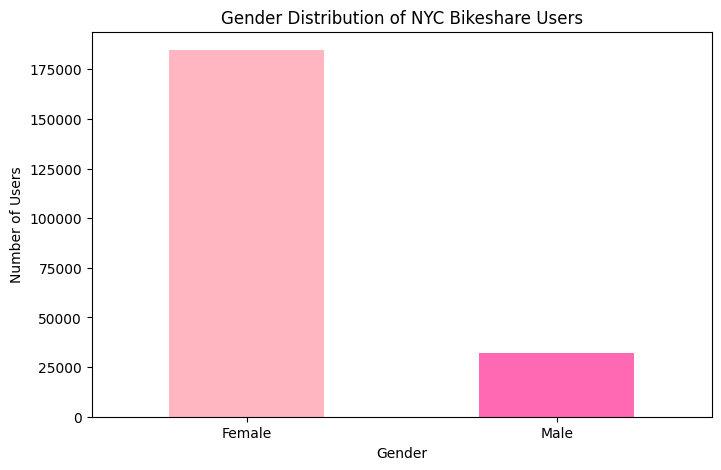

Most common age: 
40.0
Number of people that age: 
10357


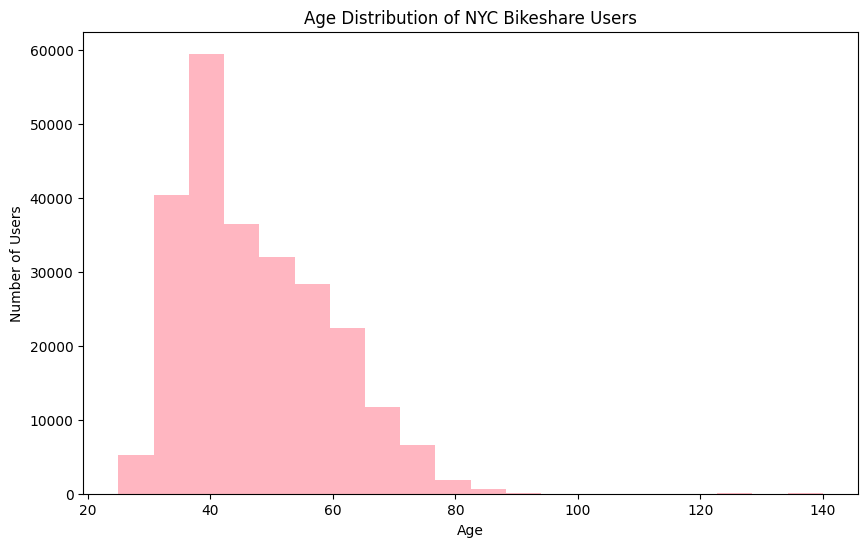

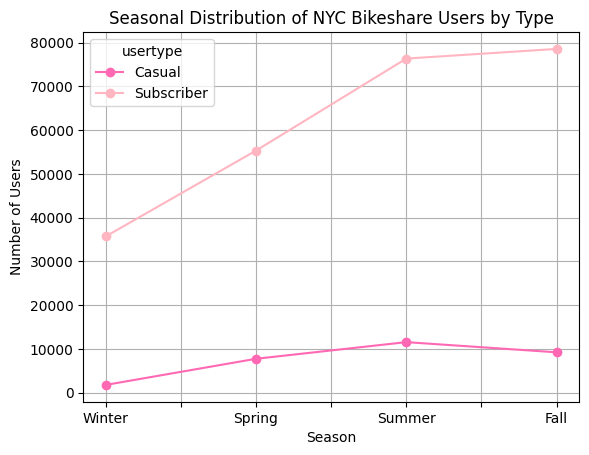

In [ ]:
#NYC

female_count = NYC['gender_Female'].sum()
male_count = NYC['gender_Male'].sum()

current_year = 2025

gender_counts = pd.Series({'Female': female_count, 'Male': male_count})

#Here, we are finding the most common gender of bikeshare users.
most_common_gender = gender_counts.idxmax()
most_common_gender_count = gender_counts.max()

print("Most common gender: ")
print(most_common_gender)
print("Number of people that are this gender: ")
print(most_common_gender_count)

# We are plotting the gender distribution.
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['lightpink', 'hotpink'])
plt.title('Gender Distribution of NYC Bikeshare Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

#Calculating the ages of users
NYC['age'] = current_year - NYC['birth year']

#finding average age
age_counts = NYC['age'].value_counts()
most_common_age = age_counts.idxmax()
most_common_age_count = age_counts.max()

print("Most common age: ")
print(most_common_age)
print("Number of people that age: ")
print(most_common_age_count)

#Plotting age distribution
plt.figure(figsize=(10, 6))
NYC['age'].plot(kind='hist', bins=20, color='lightpink')
plt.title('Age Distribution of NYC Bikeshare Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

NYC['starttime'] = pd.to_datetime(NYC['starttime'])

#Using dictionaries to assign months to quarterly seasons
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

#Creating a new 'season' column
NYC['season'] = NYC['starttime'].dt.month.map(month_to_season)


season_user_counts = NYC.groupby(['season', 'usertype']).size().unstack(fill_value=0)


season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_user_counts = season_user_counts.reindex(season_order)

season_user_counts.plot(
    kind='line',
    marker='o',
    color=['hotpink', 'lightpink']
)
plt.title('Seasonal Distribution of NYC Bikeshare Users by Type')
plt.xlabel('Season')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()



Using the available data, we wanted to calculate the average demographic of a bike-share user across NYC, Washington, and Chicago. Unfortunately, the data we were given lacked crucial information for a complete analysis, as the subscriber-to-customer ratio was the only constant data provided across all cities. Thus, we only utilized data available from NYC. Based on the data analysis of specifically NYC bikeshare users graphed in Chart 1, marketing strategies should ideally prioritize targeting women in the 35–45 age range, as they represented the largest gender and age group using the service. Over 184,000 female users use the bikeshare system, which is nearly six times the number of male users. The most common age identified was 40. We hypothesized that this is due to the idea that mid-career professionals form a key user base in the population. Additionally, seasonal patterns showed that (as expected) both casual and subscriber users increased during the warmer months, especially summer and fall, with subscriber growth being particularly steep during these quarters. This suggests that long-term users are more active during these periods, making it ideal to run targeted promotions and campaigns in the spring leading into summer, to spark the interest of key customers before the busy season. Focusing on these trends can help optimize outreach and increase ridership, particularly among women and working-age adults. It is crucial to note that there was no information provided about those who are not cisgender or non-binary, which is where the data falls flat. If further research was available, it would be necessary to look at the city's overall demographics in terms of age, gender, etc. to confirm that our results would not have been skewed any which way. Additionally, the data provided is based on individuals self-reporting. Therefore, the validity of the data is compromised.

Question 2: Which stations in New York are the most popular? Is there a difference between the popularity of the start stations and the end stations? How does time of day affect the most used stations?

In [ ]:
# geopandas for geocoding
import geopandas as gpd
# Point is to create the geometries for stations
from shapely.geometry import Point

In [ ]:
#Make the NYC shp file
# Extract all start stations
start_stations = NYC[['start station name', 'start station latitude', 'start station longitude']]
start_stations.columns = ['station_name', 'latitude', 'longitude']
# Add new column to label these stations are "start", using assign
start_stations = start_stations.assign(station_type='start')

# Extract all end stations
end_stations = NYC[['end station name', 'end station latitude', 'end station longitude']]
end_stations.columns = ['station_name', 'latitude', 'longitude']
# Label as "end" stations
end_stations = end_stations.assign(station_type='end')

# Combine start and end dfs into one using concat
stations_df = pd.concat([start_stations, end_stations])

coords_nyc = stations_df[['longitude', 'latitude']].values
# Convert the array into a list and then into a Series
coords_nyc_series = pd.Series(coords_nyc.tolist())
stations_df['geometry'] = coords_nyc_series.map(Point)

gdf_stations = gpd.GeoDataFrame(stations_df, geometry='geometry')
gdf_stations.set_crs(epsg=4326)
gdf_stations.to_file("NYC_stations.shp")
print("Shapefile created successfully!")

<ipython-input-14-8c55649ce0b7>:24: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_stations.to_file("NYC_stations.shp")
/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'station_name' to 'station_na'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'station_type' to 'station_ty'
  ogr_write(


Shapefile created successfully!


In [ ]:
gdf_nyc = gpd.read_file("NYC_stations.shp")
#Show the shp file contents
gdf_nyc

,station_na,latitude,longitude,station_ty,geometry
0,S 5 Pl & S 4 St,40.710451,-73.960876,start,POINT (-73.96088 40.71045)
1,5 Ave & E 78 St,40.776829,-73.963888,start,POINT (-73.96389 40.77683)
2,Columbus Ave & W 72 St,40.777057,-73.978985,start,POINT (-73.97898 40.77706)
3,W 13 St & 7 Ave,40.737815,-73.999947,start,POINT (-73.99995 40.73782)
4,W 44 St & 5 Ave,40.755003,-73.980144,start,POINT (-73.98014 40.755)
...,...,...,...,...,...
553591,E 45 St & 3 Ave,40.752554,-73.972826,end,POINT (-73.98014 40.755)
553592,9 Ave & W 18 St,40.743174,-74.003664,end,POINT (-73.99456 40.73971)
553593,Central Park West & W 72 St,40.775794,-73.976206,end,POINT (-73.96484 40.79127)
553594,Park Ave & Marcus Garvey Blvd,40.698617,-73.941342,end,POINT (-73.95095 40.70877)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 95.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastli

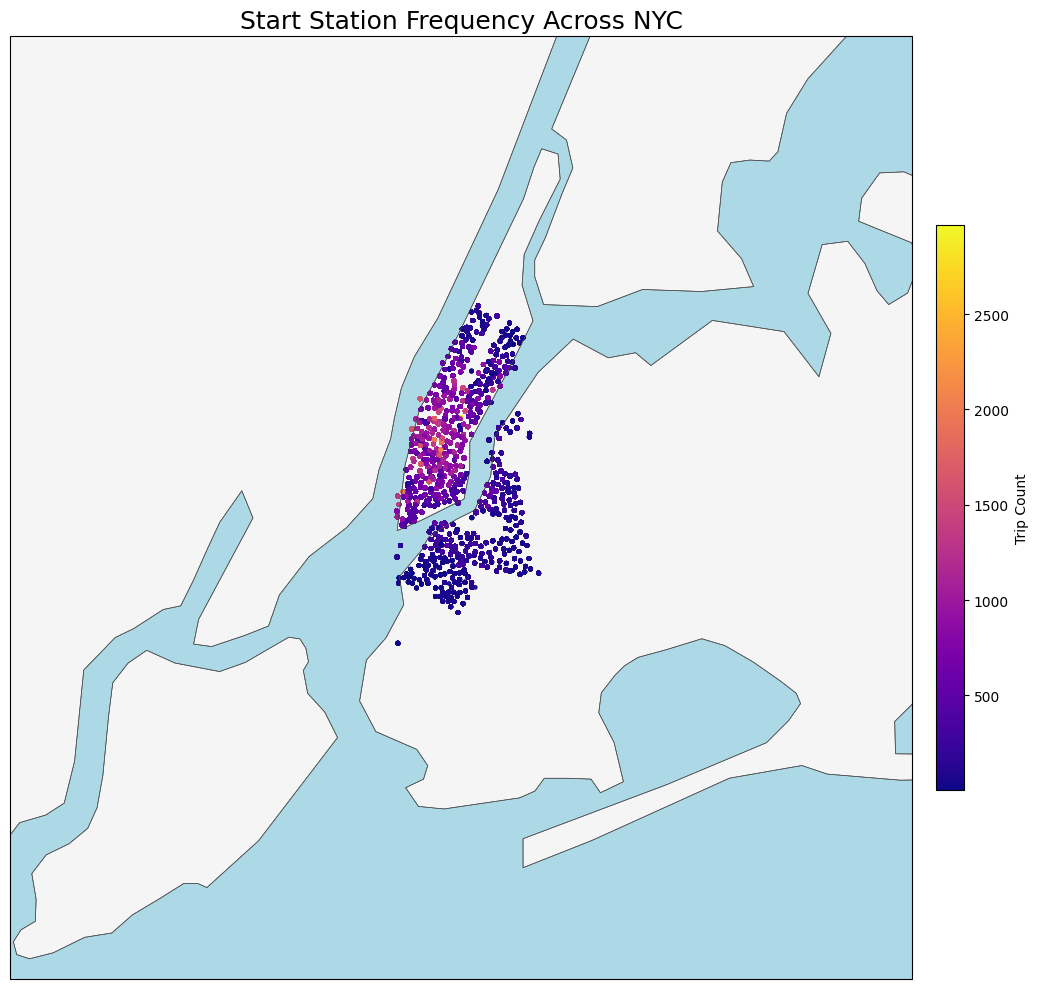

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


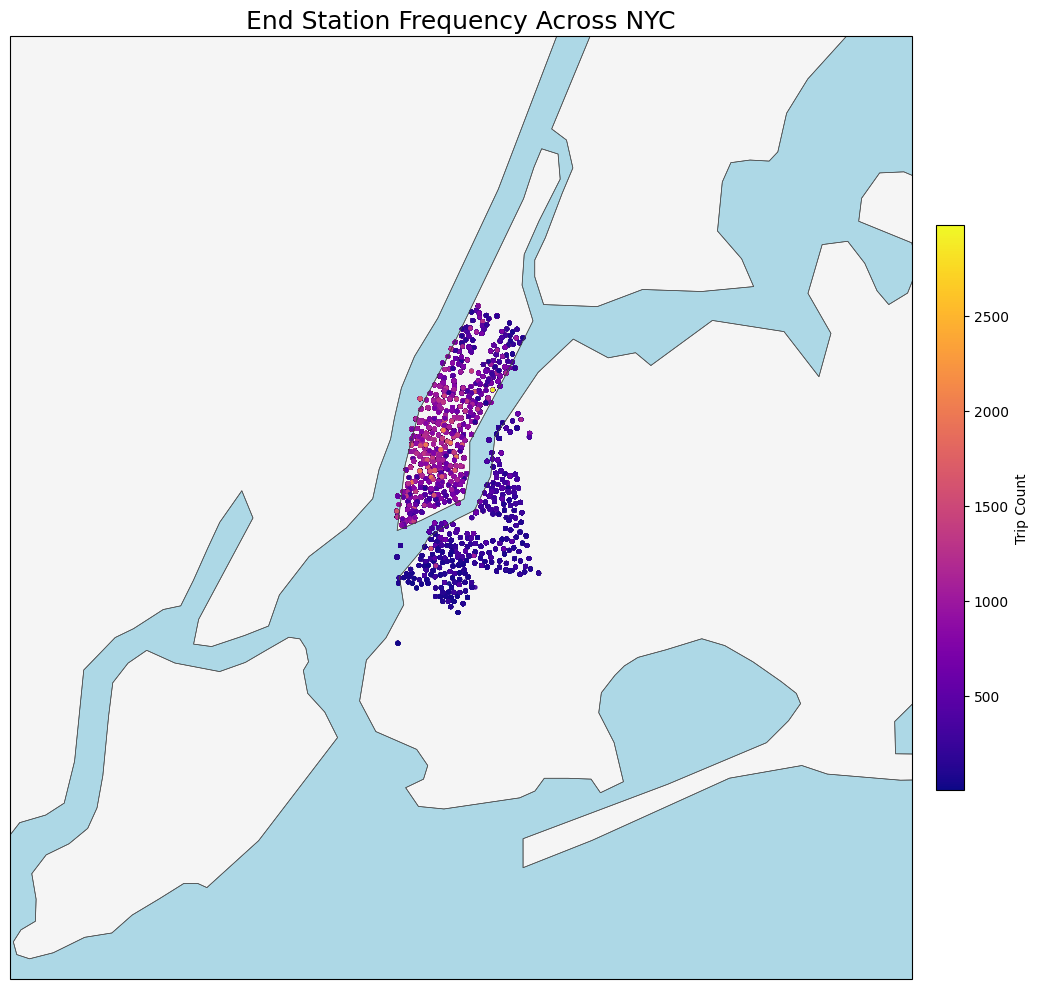

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
!pip install cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Load shapefile
# Original file NYC_points.shp failed, using NYC_stations.shp instead
gdf_nyc = gpd.read_file("NYC_stations.shp")
gdf_nyc.set_crs(epsg=4326, inplace=True)

# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
gn = pd.get_dummies(gdf_nyc['station_ty']).astype("float32")
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html
gdf_nyc = pd.concat([gdf_nyc, gn], axis=1)
gdf_nyc = gdf_nyc.drop(columns=["station_ty"])

# Filtering start and end stations
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
gdf_nyc_starts = gdf_nyc[gdf_nyc['start'] == 1.0]
gdf_nyc_ends = gdf_nyc[gdf_nyc['end'] == 1.0]

# Make frequency color map for start stations
# https://matplotlib.org/stable/users/explain/colors/colormapnorms.html
starts_freq = gdf_nyc_starts['station_na'].value_counts()
s_norm = mcolors.Normalize(vmin=starts_freq.min(), vmax=starts_freq.max())
s_cmap = plt.cm.plasma
gdf_nyc_starts['color'] = gdf_nyc_starts['station_na'].map(lambda x: s_cmap(s_norm(starts_freq[x])))

# Plot start stations over Cartopy basemap
#https://scitools.org.uk/cartopy/docs/latest/reference/projections.html
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base features
# https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.3)


gdf_nyc_starts.plot(ax=ax, transform=ccrs.PlateCarree(), color=gdf_nyc_starts['color'], markersize=6, alpha=0.9)


ax.set_extent([-74.255, -73.7, 40.49, 40.93], crs=ccrs.PlateCarree())

# Title and colorbar
ax.set_title('Start Station Frequency Across NYC', fontsize=18)
sm = cm.ScalarMappable(cmap=s_cmap, norm=s_norm)
sm.set_array([])
# Shrink colorbar so it doesn't take over the plot
fig.colorbar(sm, ax=ax, orientation='vertical', label='Trip Count', shrink=0.6, pad=0.02)
plt.tight_layout()
plt.show()

# Same thing for end stations
ends_freq = gdf_nyc_ends['station_na'].value_counts()
e_norm = mcolors.Normalize(vmin=ends_freq.min(), vmax=ends_freq.max())
e_cmap = plt.cm.plasma
gdf_nyc_ends['color'] = gdf_nyc_ends['station_na'].map(lambda x: e_cmap(e_norm(ends_freq[x])))

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.3)

gdf_nyc_ends.plot(ax=ax, transform=ccrs.PlateCarree(), color=gdf_nyc_ends['color'], markersize=6, alpha=0.9)

ax.set_extent([-74.255, -73.7, 40.49, 40.93], crs=ccrs.PlateCarree())

ax.set_title('End Station Frequency Across NYC', fontsize=18)
sm = cm.ScalarMappable(cmap=e_cmap, norm=e_norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', label='Trip Count', shrink=0.6, pad=0.02)
plt.tight_layout()
plt.show()


The first figure generated is a map of the frequency of various start stations across New York City. The primary boroughs utilizied, as illustrated by this map are Manhattan, Queens and Brooklyn. Additionally, this map shows a large increase in the use of start stations in Midtown South. This neighborhood of Manhattan features many popular tourist sights, including Bryant Park, the Empire State Building and Madison Square Garden.

The second figure generated shows a map of the frequency of the end stations. Like the first maps, the End Stations are primarily in Manhattan, Queens and Brooklyn. While the data was separated into two sets comparing utilization of stations for beginning and ending trips, it was apparent that they both followed the same broad trends of use. However, there were subtle differences present between the two, particularly, end stations showed a more widespread distribution of use, with more customers utilizing them to end their journeys in what may be assumed to be their home boroughs.

In the second map, there appears to be an outlier (strikingly yellow dot) on the Upper East Side. However, this dot is actually on Roosevelt Island.

Assessing the New York dataset, the most frequently utilized stations were in the borough of Manhattan, with an area of increased use primarily localized around midtown. This cluster is likely due to the presence of Penn station as a hub for commuters, and numerous tourist destinations in the immediate area.

3. Can a regression model be created to predict the trip duration of a user's ride, based on their gender, age, subscriber status, time of day, start location, etc.?

In [ ]:
NYC = pd.read_csv("NYC-CitiBike-2016.csv")

In [ ]:
NYC["usertype"] = NYC["usertype"].replace("Customer", "Casual")
NYC = pd.get_dummies(NYC, columns=['usertype'], prefix='usertype', drop_first=True)
NYC = pd.get_dummies(NYC, columns=['gender'], prefix='gender', drop_first=True)
NYC['is_customer'] = (NYC['usertype_Subscriber'] == 1).astype(int)
NYC['gender_1'] = NYC['gender_1'].astype(int)
NYC = NYC.drop(columns = ['usertype_Subscriber', 'gender_2'])
NYC.rename(columns={'is_customer': 'user_type'}, inplace=True)

In [ ]:
NYC['starttime'] = pd.to_datetime(NYC['starttime'])
NYC['stoptime'] = pd.to_datetime(NYC['stoptime'])
NYC['start_hour'] = NYC['starttime'].dt.hour
NYC['start_minute'] = NYC['starttime'].dt.minute
NYC['start_day'] = NYC['starttime'].dt.day
NYC['start_month'] = NYC['starttime'].dt.month
NYC['start_year'] = NYC['starttime'].dt.year

NYC['stop_hour'] = NYC['stoptime'].dt.hour
NYC['stop_minute'] = NYC['stoptime'].dt.minute
NYC['stop_day'] = NYC['stoptime'].dt.day
NYC['stop_month'] = NYC['stoptime'].dt.month
NYC['stop_year'] = NYC['stoptime'].dt.year

NYC = NYC.drop(columns=['starttime'])
NYC = NYC.drop(columns=['stoptime'])
NYC = NYC.drop(columns=['start station name'])
NYC = NYC.drop(columns=['end station name'])

NYC = NYC.dropna()

In [ ]:
cols = ['bikeid'] + [col for col in NYC.columns if col != 'bikeid']
NYC = NYC[cols]

cols = ['user_type'] + [col for col in NYC.columns if col != 'user_type']
NYC = NYC[cols]

In [ ]:
NYC.head()

,user_type,bikeid,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,birth year,...,start_hour,start_minute,start_day,start_month,start_year,stop_hour,stop_minute,stop_day,stop_month,stop_year
1,1,23514,686,3143,40.776829,-73.963888,3132,40.763505,-73.971092,1960.0,...,0,21,1,1,2016,0,32,1,1,2016
2,1,14536,315,3164,40.777057,-73.978985,3178,40.784145,-73.983625,1971.0,...,0,33,1,1,2016,0,38,1,1,2016
3,1,24062,739,223,40.737815,-73.999947,276,40.717488,-74.010455,1969.0,...,0,40,1,1,2016,0,53,1,1,2016
5,1,22823,525,474,40.745168,-73.986831,470,40.743453,-74.000040,1975.0,...,0,47,1,1,2016,0,55,1,1,2016
6,1,18602,659,387,40.712733,-74.004607,377,40.722438,-74.005664,1991.0,...,0,55,1,1,2016,1,6,1,1,2016


Remove outliers

In [ ]:
Q1 = NYC['tripduration'].quantile(0.25)
Q3 = NYC['tripduration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

NYC = NYC[(NYC['tripduration'] >= lower_bound) & (NYC['tripduration'] <= upper_bound)]

Baseline random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [ ]:
X  = NYC.drop(columns = ["tripduration", "start_hour", "start_minute", "stop_hour", "stop_minute"])
y = NYC["tripduration"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(max_depth = 20, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R^2 Score: ", r2)

MSE:  48258.844090557635
R^2 Score:  0.6905233109688482


Log transform Y so that relationship between X and y is more linear!

In [ ]:
y_log = np.log1p(y)

In [ ]:
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42)

In [ ]:
rf.fit(X_train, y_train_log)

RandomForestRegressor(max_depth=20, random_state=42)

In [ ]:
y_pred_log = rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test_log, y_pred_log)
r2 = r2_score(y_test_log, y_pred_log)

print("MSE: ", mse)
print("R^2 Score: ", r2)

# 0.12833 = 1.7 seconds

MSE:  0.1283333490931037
R^2 Score:  0.6825266680370543


Grid Search to optimize hyperparameters

In [ ]:
rf2 = RandomForestRegressor(random_state=42) #remove max_depth!

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=rf2,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search.fit(X_train, y_train_log)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

Best parameters found: {'max_depth': 30, 'n_estimators': 200}
Best cross-validated score: -0.35212391936546633


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test_log, y_pred)
r2 = r2_score(y_test_log, y_pred)

print("MSE: ", mse) #1.1242 seconds
print("R^2 Score: ", r2)

MSE:  0.11714229672400896
R^2 Score:  0.7102112933421323


In [ ]:
param_grid = {
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

In [ ]:
rf3 = RandomForestRegressor(max_depth = 30, n_estimators = 200, random_state=42)

In [ ]:
grid_search = GridSearchCV(
    estimator=rf3,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search.fit(X_train, y_train_log)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=30, n_estimators=200,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test_log, y_pred)
r2 = r2_score(y_test_log, y_pred)

print("MSE: ", mse) #1.1240 seconds so not much improvement
print("R^2 Score: ", r2)

MSE:  0.1168338789464209
R^2 Score:  0.7109742627509368


In [ ]:
rf4 = RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [ ]:
param_grid = {
    'ccp_alpha': np.linspace(0, 0.02, 5) #trying 10 values from 0 to 0.02 (increment by 10)
}

In [ ]:
grid_search = GridSearchCV(
    estimator=rf4,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train_log)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=30, min_samples_leaf=2,
                                             min_samples_split=5,
                                             n_estimators=200,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test_log, y_pred)
r2 = r2_score(y_test_log, y_pred)

print("MSE: ", mse) #1.1240 seconds so not much improvement
print("R^2 Score: ", r2)

MSE:  0.1168338789464209
R^2 Score:  0.7109742627509368


In [ ]:
rf_final = RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
rf_final.fit(X_train, y_train_log)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([('rf_final', RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42))])

In [ ]:
cv_results = cross_validate(pipeline, X, y_log, cv=10, scoring=['r2', 'neg_root_mean_squared_error'], return_train_score=True)

In [ ]:
print("Mean R^2:", cv_results['test_r2'].mean())
print("Mean RMSE:", -cv_results['test_neg_root_mean_squared_error'].mean()) #2.22 seconds

Mean R^2: 0.7095233263617311
Mean RMSE: 0.3431156587972971


Add "start hour" to see if additional patterns are captured

In [ ]:
X  = NYC.drop(columns = ["tripduration", "start_minute", "stop_hour", "stop_minute"])
y = NYC["tripduration"]

In [ ]:
rf_final = RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
y_log = np.log1p(y)

In [ ]:
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.33, random_state=42)

In [ ]:
rf_final.fit(X_train, y_train_log)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [ ]:
y_pred_log = rf_final.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test_log, y_pred_log)
r2 = r2_score(y_test_log, y_pred_log)

print("MSE: ", mse)
print("R^2 Score: ", r2)

MSE:  0.12032532236632905
R^2 Score:  0.7043052371325172


Cross validate w/ "start hour"

In [ ]:
#Skipped straight to cross validate this result
pipeline = Pipeline([('rf_final', RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42))])

In [ ]:
cv_results = cross_validate(pipeline, X, y_log, cv=10, scoring=['r2', 'neg_root_mean_squared_error'], return_train_score=True)

In [ ]:
print("Mean R^2:", cv_results['test_r2'].mean())
print("Mean RMSE:", -cv_results['test_neg_root_mean_squared_error'].mean())

Mean R^2: 0.7097385506567757
Mean RMSE: 0.342987957003867


Visualize Tree

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.tree import plot_tree

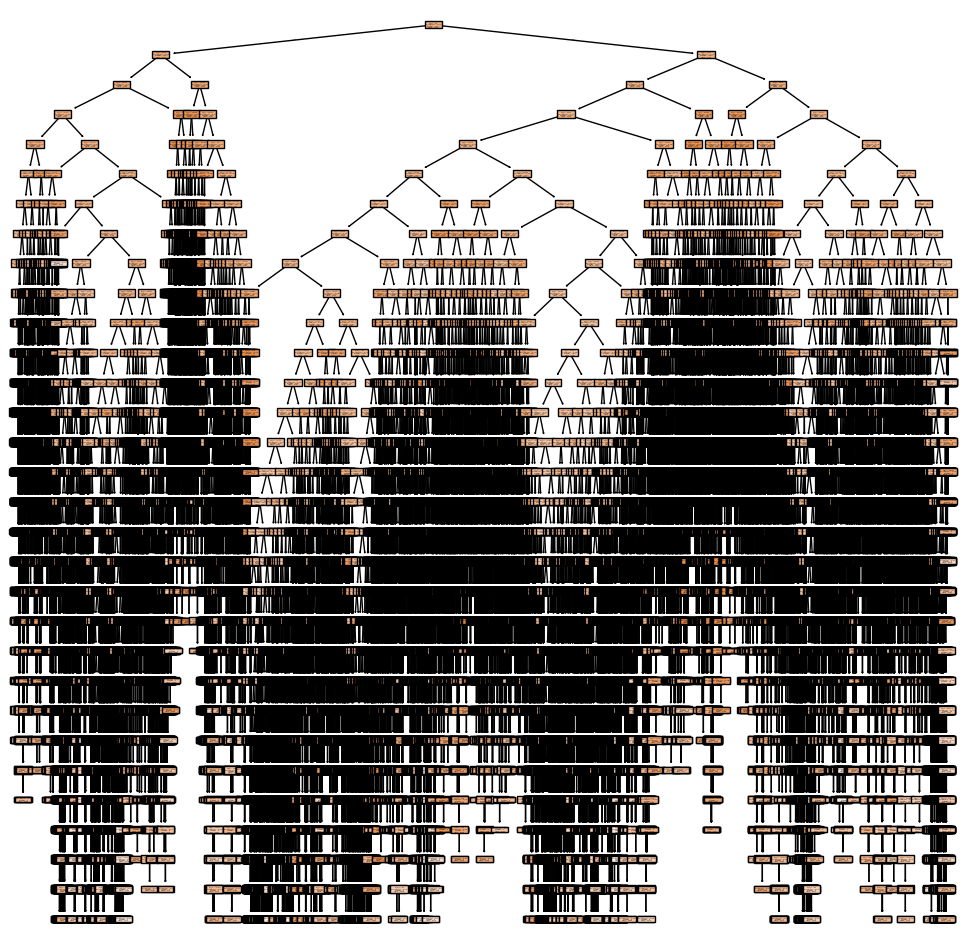

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(rf_final.estimators_[0], max_depth=30, filled=True, ax=ax)
plt.show()

In [ ]:
X.head(2)

,user_type,bikeid,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,birth year,gender_1,start_hour,start_day,start_month,start_year,stop_day,stop_month,stop_year
1,1,23514,3143,40.776829,-73.963888,3132,40.763505,-73.971092,1960.0,1,0,1,1,2016,1,1,2016
2,1,14536,3164,40.777057,-73.978985,3178,40.784145,-73.983625,1971.0,1,0,1,1,2016,1,1,2016


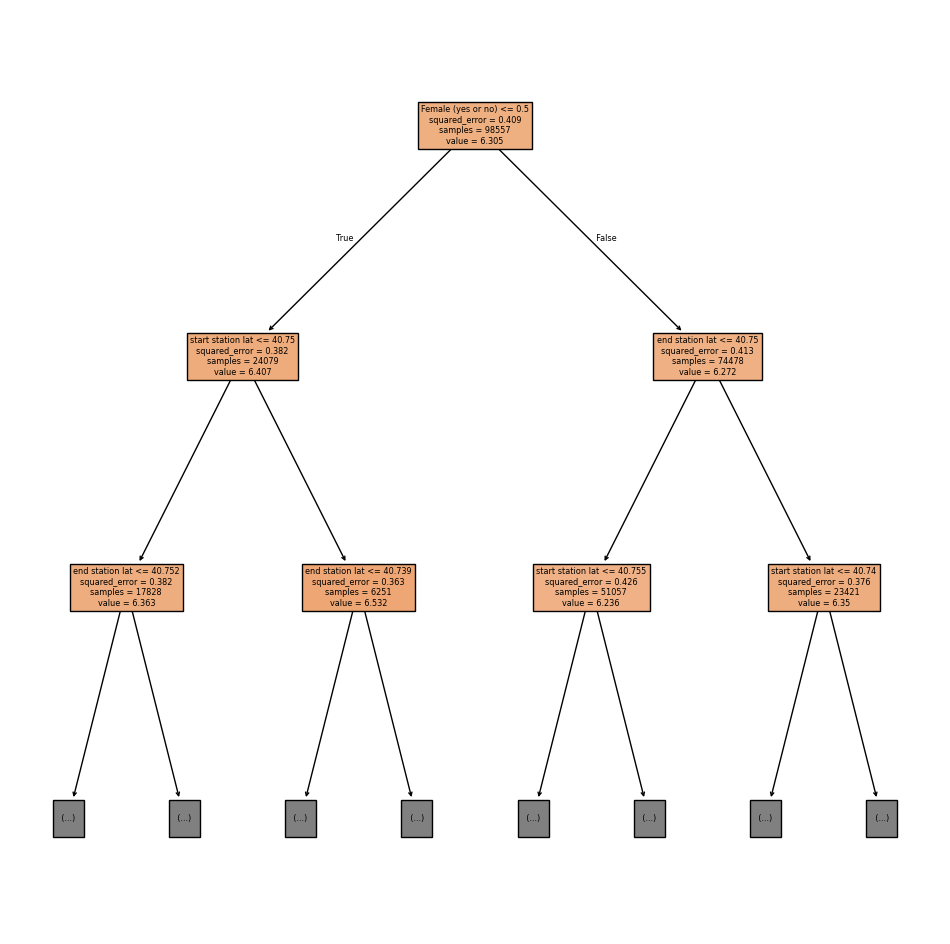

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(rf_final.estimators_[0], max_depth=2, filled=True, ax=ax, feature_names = ("user_type", "biked", "stat station id", "start station lat", "start station long", "end station id", "end station lat", "end station long", "birth year", "Female (yes or no)", "start hour", "start day", "start month", "start year", "stop day", "stop month", "stop year"))
plt.show()

Plots to Visualize Model Performance

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_pred_log = cross_val_predict(pipeline, X, y_log, cv=10)

In [ ]:
y_pred = np.exp(y_pred_log)
y_actual = np.exp(y_log)

residuals = y_actual - y_pred

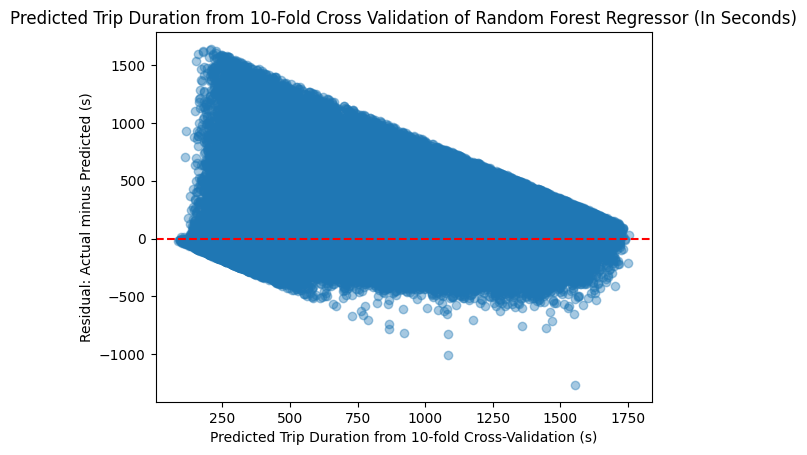

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Trip Duration from 10-fold Cross-Validation (s)")
plt.ylabel("Residual: Actual minus Predicted (s)")
plt.title("Predicted Trip Duration from 10-Fold Cross Validation of Random Forest Regressor (In Seconds)")
plt.show()

Text(0.5, 1.0, 'Predicted vs Actual Trip Duration from 10-Fold Cross Validation (in Seconds)')

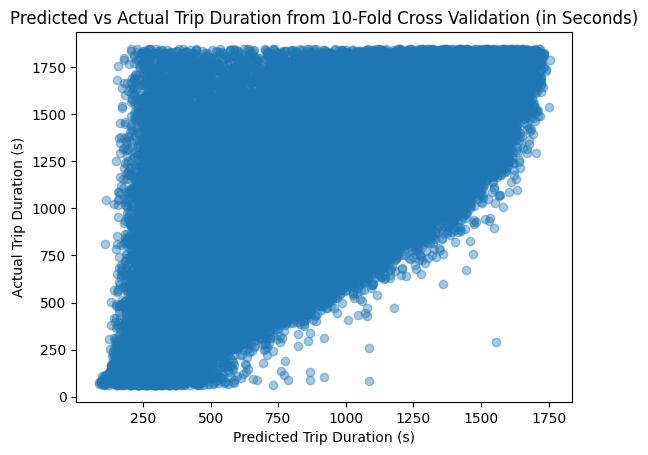

In [ ]:
plt.scatter(y_pred, y_actual, alpha=0.4)
plt.xlabel("Predicted Trip Duration (s)")
plt.ylabel("Actual Trip Duration (s)")
plt.title("Predicted vs Actual Trip Duration from 10-Fold Cross Validation (in Seconds)")

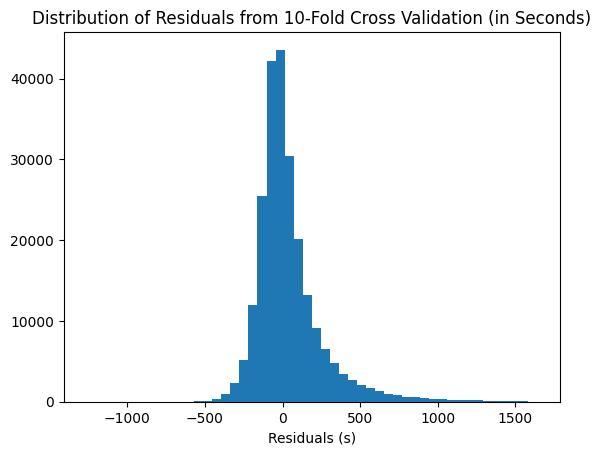

In [ ]:
plt.hist(residuals, bins=50)
plt.xlabel('Residuals (s)')
plt.title('Distribution of Residuals from 10-Fold Cross Validation (in Seconds)')
plt.show()

Importance of Predictors

In [ ]:
_df_1 = pd.DataFrame({
    'predictor': X.columns,
    'importance': rf_final.feature_importances_
})

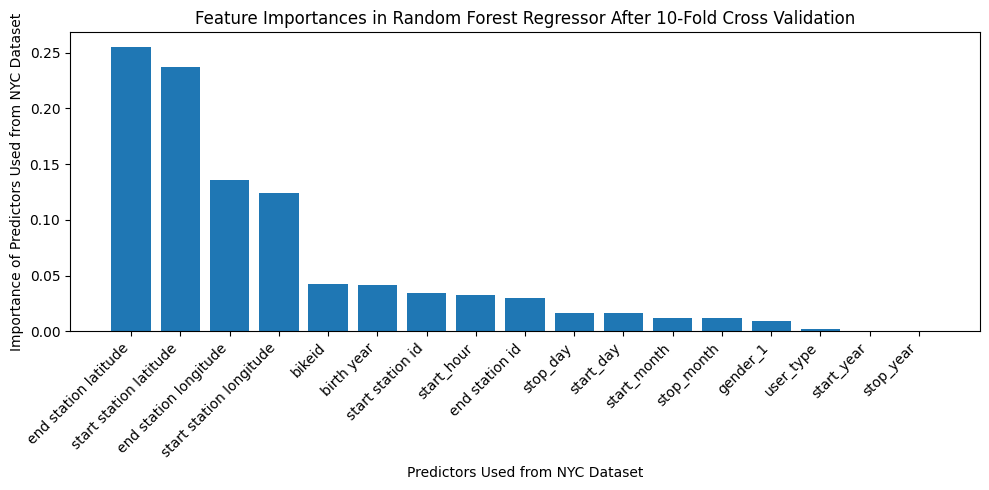

In [ ]:
_df_1 = _df_1.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(_df_1['predictor'], _df_1['importance'])
plt.title('Feature Importances in Random Forest Regressor After 10-Fold Cross Validation')
plt.xlabel('Predictors Used from NYC Dataset')
plt.ylabel('Importance of Predictors Used from NYC Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The goal of this section was to determine if a regression model could be used to predict trip duration. First, a linear regression model was created. The Mean Squared Error (MSE) was approximately 200,000 and the R^2 was 0.2. Even after applying Principal Component Analysis (PCA), L2 regularization, feature engineering and target transformations, the model was still making severely inaccurate predictions. It was hypothesized that either the data violated multiple of the fundamental assumptions of linear regression (LR)--hence why transformations and engineering did not work--or the data was too noisy for LR to capture all of the variance. This portion of the experiment is not featured in this notebook for brevity. For this code, please contact the authors.

To capture a more complex relationship between X and Y, a baseline decision tree was created. The MSE and R^2 of this model saw a significant improvement over linear regression. However, the final model selected was Random Forests, as these are very good at eliminating variance within a dataset.

The initial Random Forest Regressor (RFR) created achieved a MSE of 48,258 and an R^2 of 0.691. To linearize the relationship between X and Y, the target was log-transformed. The RFR then achieved a MSE and R^2 of 0.128 (+/- 43% of the true value) and 0.683, respectively. Clearly, the MSE still has much room for improvement.

Hyperparameter tuning was performed next. 3-fold cross validation was used to determine the optimal cost complexity pruning value (alpha), max depth, number of estimators, minimum number of splits and minimum number of leaf nodes. The most interesting observation made from this was that the optimal ccp_alpha value was found to be 0, meaning that no pruning is necessary. Typically, no pruning leads to overfitting. The model not overfitting might then suggest that the model is underfitting. The MSE and R^2, after hyperparameter tuning were found to be 0.117 (+/- 41% of the true value) and 0.71, respectively.

10-fold cross validation was used to evaluate the robustness of the model. The MSE was 0.118 (+/- 41% of the true value) and the R^2 was 0.710. The MSE increased slightly, but not enough to make a difference on the accuracy of the predictions.

An additional feature "start hour" was added. The intent behind this was to evaluate if general time of day (morning/night rush hour or lunch time) had an affect on trip duration. The 10-fold cross validated scores with "start hour" included were a MSE of 0.118 and a R^2 of 0.710. Clearly, this additional feature did not impact the accuracy of the regression model.

Finally, a few visualizations were made. Figure 1 shows th entire decision tree. The tree was expected to be large, as the optimal maximum depth was found to be 30 and no pruning was included (via cross validation of ccp_alpha). Additionally, the tree created was used on a regression problem and regression trees are often large. Often, such large trees are assumed to be overfit. However, the hyperparameter tuning found that no pruning was needed. Figure 2 is zooms in on the first 3 layers of the decision tree.

Figure 3 plots the predicted trip duration against the residuals. This graph shows a clear pattern amongst the residuals, confirming the earlier hypothesis that a fundamental assumption of linear regression was violated; in this case, the residuals are heteroscedastic. Decision trees, though, do not assume homoscedasticity, therefore no assumption was violated in the selected model. What can be inferred from this graph is that the model often predicts a trip to be shorter than it actually is. To combat this, the model should be trained on data with shorter trip durations.

Figure 4 illustrates that this model struggles to accurately predict trip durations that deviate extremely from the mean. This means that the model is regressing towards the mean and that the decision trees are struggling to capture the non-linearity of the model. Additionally, because the data used is from the real world, it is extremely noisy and so an incredibly robust model must be used to minimize the variance. To combat these issues, other models, such as neural networks and boosted decision trees with a gradient descent, should be considered.

Figure 5 shows a rightly skewed distribution centered around 0 (on the x-axis). The skew shows that the model sometimes predicts trips to be shorter than they actually are, reinforcing what was displayed in figure 3.

Figure 6 shows the importance of the predictors in the model. The latitude of the start and end stations were the most important predictors, contributing about 50% of the input, collectively. Longitude was a close second, contributing about 25% of the input. All other data points contributed less than 5% of the input.

In conclusion, a decently robust model was created, given the limitations of decision trees. Specifically, a Random Forest Regressor was used to predict trip duration. After hyperparamater tuning and 10-fold cross validation, a final MSE and R^2 of 0.118 and 71% were found, respectively. To make more accurate predictions, other models and model features that can minimize noise, capture non-linearity and manage heteroscedascity should be used.


4. Which time of day has the longest bike rides? Do the times of day differ between each city?

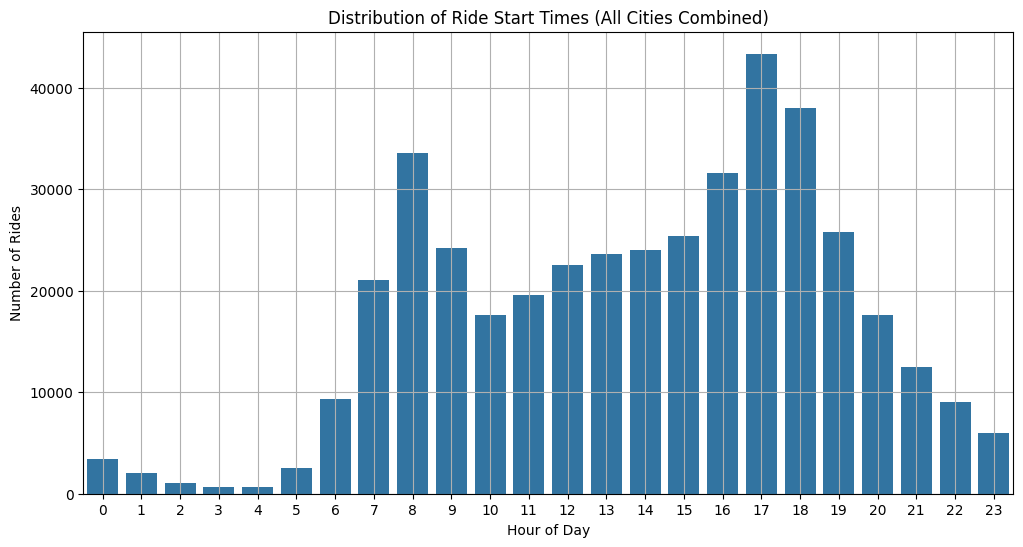

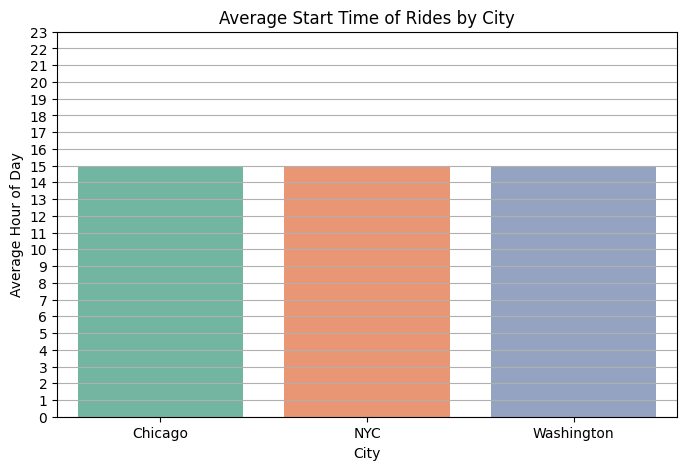

In [ ]:
import seaborn as sns

# Add hour and city columns
Washington['hour'] = pd.to_datetime(Washington['starttime']).dt.hour
Washington['city'] = 'Washington'

NYC['hour'] = pd.to_datetime(NYC['starttime']).dt.hour
NYC['city'] = 'NYC'

Chicago['hour'] = pd.to_datetime(Chicago['starttime']).dt.hour
Chicago['city'] = 'Chicago'

# Combine the dataframes
combined_df = pd.concat([Washington, NYC, Chicago])
combined_df = combined_df[['tripduration', 'hour', 'city']]

# Graph 1: Distribution of Start Times (All cities combined)
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='hour')
plt.title('Distribution of Ride Start Times (All Cities Combined)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

# Graph 2: Average Start Time by City
avg_hour = combined_df.groupby('city')['hour'].median().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_hour, x='city', y='hour', hue='city', palette='Set2', legend=False)
plt.title('Average Start Time of Rides by City')
plt.ylabel('Average Hour of Day')
plt.xlabel('City')
plt.yticks(range(0, 24))
plt.grid(True, axis='y')
plt.show()

In graph one, the  average distribution of the frequency of bikeshares being used in New York City is displayed, accounting for the specific times of day relative to the number of rides utilized at a specific time. The most frequent use of bikeshare rides occurs around 5pm, at a little over 40,000 individuals using the bike system at that time. The second peak time occurrs around 8 am, most likely when people are traveling to work. People might be more inclined to utilize the system when they aren't under pressure to arrive on time to work. Thus, they may opt for more of a environmentally friendly, yet sometimes unpredictable option leaving work.

The second graph looks at the three different cities that provided us with bikeshare data. Here, the data shows that the frequency of bike use tends to average out around 3pm. We hypothesized that this is the case because, though people rely on the system for transport to and from work (8 am/5 pm), there is a significant peak around 5pm and 6 pm (graph one). Hence, the average time of bikes being used is slightly skewed towards the mid afternoon.

**Conclusion**

Based on our findings, we would advise our clients to place bike stations near large, non-residential business areas and tourist hotspots, specifically focusing on the latitude of these locations. Additionally, we would suggest that our clients host promotions during peak bikeshare hours and seasons, such as 5 pm and summer, respectively.

We would also advise our clients to target female identifying individuals in their 40s.

Finally, if our clients wanted to charge prices based on the length of a bike ride, our consulting group would provide the decision tree, implemented with a user-friendly interface, to our client. From there, the client could use various attributes about frequent bikeriders to determine the proper amount to charge per minute.